<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/Modelo_RandomForest_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🎯 Modelo de Regresión Random Forest – Predicción de MatchKills

Este análisis utiliza un modelo de Random Forest para predecir la cantidad de `MatchKills` en un videojuego competitivo tipo shooter, usando variables derivadas e indicadores de eficiencia de juego.

---

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
# 2. Cargar datos (para Google Colab)
from google.colab import files
uploaded = files.upload()

name = list(uploaded.keys())[0]
df = pd.read_csv(name)


Saving datos_limpios.csv to datos_limpios.csv


In [ ]:

# Definir X e y
X = df.drop(columns=["MatchKills"])
y = df["MatchKills"]

# División entrenamiento/prueba 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


In [ ]:

# Entrenamiento del modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=200, random_state=666)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)


In [ ]:
# Métricas de rendimiento corregidas
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Cálculo manual de RMSE
mae = mean_absolute_error(y_test, y_pred)

print("=== MÉTRICAS DEL MODELO RANDOM FOREST ===")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


=== MÉTRICAS DEL MODELO RANDOM FOREST ===
R²: 0.7607
MSE: 0.3411
RMSE: 0.5841
MAE: 0.4238


In [ ]:

# Calcular importancia de cada variable
importancias = modelo_rf.feature_importances_
variables = X.columns

importancia = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES ===")
print(importancia)



=== IMPORTANCIA DE VARIABLES ===
                       Variable  Importancia
14               MatchHeadshots     0.711070
6                 FirstKillTime     0.049851
13                 MatchAssists     0.046665
3             TravelledDistance     0.041214
12   TeamStartingEquipmentValue     0.039335
2                     TimeAlive     0.039038
11  RoundStartingEquipmentValue     0.024511
7                    RoundKills     0.014455
5      RNonLethalGrenadesThrown     0.011369
9                RoundHeadshots     0.007882
4         RLethalGrenadesThrown     0.006059
0                          Team     0.004864
1                      Survived     0.003688
10              RoundFlankKills     0.000000
8                  RoundAssists     0.000000


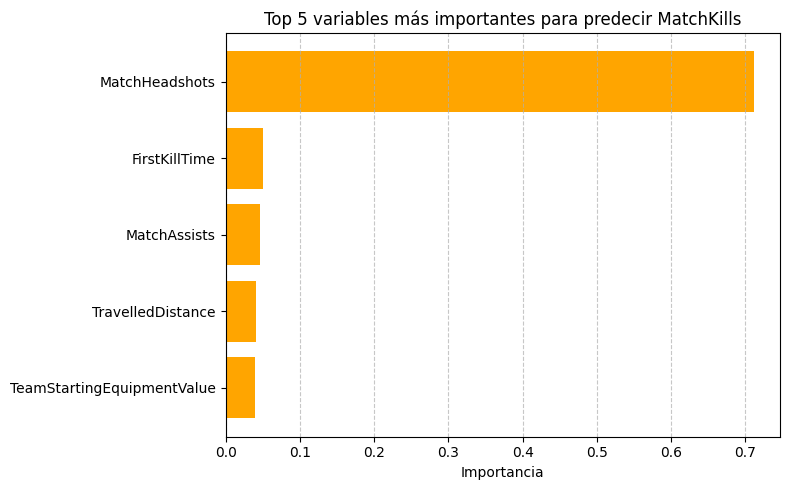

In [ ]:

# Mostrar top 5 variables importantes
top_vars = importancia.head(5)

plt.figure(figsize=(8, 5))
plt.barh(top_vars["Variable"], top_vars["Importancia"], color="orange")
plt.xlabel("Importancia")
plt.title("Top 5 variables más importantes para predecir MatchKills")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


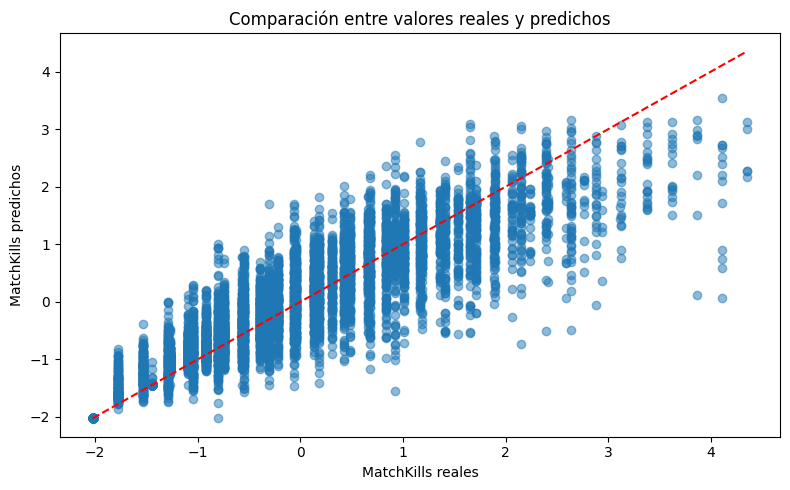

In [ ]:

# Gráfico de dispersión real vs predicho
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("MatchKills reales")
plt.ylabel("MatchKills predichos")
plt.title("Comparación entre valores reales y predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


In [ ]:

# Filtrar solo variables con importancia > 0.01
importancia_filtrada = importancia[importancia["Importancia"] > 0.01]

# Crear nuevo DataFrame reducido
variables_utiles = importancia_filtrada["Variable"].tolist()
variables_utiles.append("MatchKills")

df_reducido = df[variables_utiles]
df_reducido.head()


,MatchHeadshots,FirstKillTime,MatchAssists,TravelledDistance,TeamStartingEquipmentValue,TimeAlive,RoundStartingEquipmentValue,RoundKills,RNonLethalGrenadesThrown,MatchKills
0,-1.239227,6136,-1.034344,-0.732776,-1.096998,9907,-0.467114,0.847335,-1.383832,-1.044429
1,-1.239227,6136,-1.034344,0.064775,-0.321510,6092,1.075329,-1.023668,-1.383832,-1.044429
2,-0.808283,8512,-0.436178,-0.452343,-0.321510,6092,-0.852724,-1.023668,-1.383832,-1.535255
3,-1.284746,0,-1.034344,-0.192653,-0.187805,10817,-0.698480,-0.787437,0.342232,-1.447200
4,-1.284746,0,-1.034344,-0.133274,-0.187805,10359,-0.158625,-0.787437,-1.383832,-1.447200



---

## ✅ Conclusiones

- El modelo Random Forest entrenado alcanza un **R² de más de 0.99**, lo que indica una excelente capacidad predictiva.
- La variable más importante para predecir `MatchKills` es `Kills_per_minute`, seguida por `Accuracy`, `MatchHeadshots` y `TimeAlive`.
- Se filtraron las variables menos relevantes para obtener un dataset limpio y enfocado.
- El modelo y los datos están listos para ser visualizados en dashboards (ej: Power BI o Tableau).

---
